<a href="https://colab.research.google.com/github/PahadiASD/TextSummarizer/blob/main/Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Install the uncommented evrytime in google colab
!pip install matplotlib
!pip install wget
!pip install nltk
!pip install pandas
!pip install beautifulsoup4
!pip install keras==2.3.1
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install tensorflow-estimator==1.15.0
!pip install numpy==1.19.5
!pip install lxml
!pip install scikit-learn
!pip install transformers
!pip install datasets
!pip install rouge_score

In [ ]:
#!pip install tensorflow-gpu==1.15
# import keras==2.2.4
import glob
import os
import numpy as np
import pandas as pd
import re
import os
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
import nltk

Using TensorFlow backend.


In [ ]:
#CNN Daily mail data
data=pd.read_csv("/content/drive/MyDrive/Capstone dataset/train.csv",nrows=100000)
data

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundr...","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, author...","Criminal complaint: Cop used his role to help cocaine traffickers .\nRalph Mata, an internal affairs lieutenant, allegedly helped group get guns .\nHe also arranged to pay two assassins in a murde..."
2,00027e965c8264c35cc1bc55556db388da82b07f,"A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he r...","Craig Eccleston-Todd, 27, had drunk at least three pints before driving car .\nWas using phone when he veered across road in Yarmouth, Isle of Wight .\nCrashed head-on into 28-year-old Rachel Titl..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,"(CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prio...","Nina dos Santos says Europe must be ready to accept sanctions will hurt both sides .\nTargeting Russia's business community would be one way of sapping their support for President Putin, she says ..."
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the table. The Cod Army are playing in the third tier ...,"Fleetwood top of League One after 2-0 win at Scunthorpe .\nPeterborough, Bristol City, Chesterfield and Crawley all drop first points of the season .\nStand-in striker Matt Done scores a hat-trick..."
...,...,...,...
99995,0cd7ec4013b0a6dbbc9f15ce8a7ff757db5b8ad9,"By . Deni Kirkova . PUBLISHED: . 05:54 EST, 1 November 2013 . | . UPDATED: . 03:36 EST, 6 November 2013 . Disney Princesses pay homage to their tearaway sister Miley Cyrus this Halloween in a set ...","Eleven innocent princesses raunch up as Miley for Halloween .\nMichele Moricci, 30, from Florence, drew them for Cosmopolitan ."
99996,0cd84db8ebc91821d07d910e830d8710021a2d6a,A furious Harvard Business School professor has gone to extreme measures to recuperate $4 from a Massachusetts restaurant he claims overcharged him. Ben Edelman - an associate professor of busines...,"Ben Edelman is an associate professor of business administration at Harvard who also runs a consulting firm that prevents online frauf .\nHe ordered takeout from Sichuan Garden in Brookline, Massa..."
99997,0cd875596eada9164e7d349d654697c342020b65,"By . Daily Mail Reporter . Lewis Dale, 17, is facing a lengthy jail term after stabbing his grandmother to death while high mephedrone . A teenager, jailed today for stabbing his grandmother to de...","Lewis Dale, 17, weeps in the dock as he is told he faces lengthy jail term .\nHe stabbed grandmother Irene Dale, 78, four times with a kitchen knife .\nFound guilty of her murder and the attempted..."
99998,0cd9048c654458e89b9f2a219da1b4d12bc6550f,"By . Daily Mail Reporter . PUBLISHED: . 11:09 EST, 3 February 2014 . | . UPDATED: . 13:04 EST, 3 February 2014 . This is the shocking moment a road rage driver deliberately rammed his car into a m...","CCTV shows driver chase a man on a scooter and swerve his car into him .\nHe leaves scooter rider for dead and speeds off in Jiangsu Province, China .\nhe was later arrested as scooter rider is tr...

In [ ]:
#-- get length of each article and summary for analysis
data['articles_length'] = data['article'].apply(lambda x : len(x.split()))
data['summaries_length'] = data['highlights'].apply(lambda x : len(x.split()))
data

,id,article,highlights,articles_length,summaries_length
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundr...","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown...",198,37
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, author...","Criminal complaint: Cop used his role to help cocaine traffickers .\nRalph Mata, an internal affairs lieutenant, allegedly helped group get guns .\nHe also arranged to pay two assassins in a murde...",392,38
2,00027e965c8264c35cc1bc55556db388da82b07f,"A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he r...","Craig Eccleston-Todd, 27, had drunk at least three pints before driving car .\nWas using phone when he veered across road in Yarmouth, Isle of Wight .\nCrashed head-on into 28-year-old Rachel Titl...",808,69
3,0002c17436637c4fe1837c935c04de47adb18e9a,"(CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prio...","Nina dos Santos says Europe must be ready to accept sanctions will hurt both sides .\nTargeting Russia's business community would be one way of sapping their support for President Putin, she says ...",531,53
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the table. The Cod Army are playing in the third tier ...,"Fleetwood top of League One after 2-0 win at Scunthorpe .\nPeterborough, Bristol City, Chesterfield and Crawley all drop first points of the season .\nStand-in striker Matt Done scores a hat-trick...",580,67
...,...,...,...,...,...
99995,0cd7ec4013b0a6dbbc9f15ce8a7ff757db5b8ad9,"By . Deni Kirkova . PUBLISHED: . 05:54 EST, 1 November 2013 . | . UPDATED: . 03:36 EST, 6 November 2013 . Disney Princesses pay homage to their tearaway sister Miley Cyrus this Halloween in a set ...","Eleven innocent princesses raunch up as Miley for Halloween .\nMichele Moricci, 30, from Florence, drew them for Cosmopolitan .",408,20
99996,0cd84db8ebc91821d07d910e830d8710021a2d6a,A furious Harvard Business School professor has gone to extreme measures to recuperate $4 from a Massachusetts restaurant he claims overcharged him. Ben Edelman - an associate professor of busines...,"Ben Edelman is an associate professor of business administration at Harvard who also runs a consulting firm that prevents online frauf .\nHe ordered takeout from Sichuan Garden in Brookline, Massa...",854,82
99997,0cd875596eada9164e7d349d654697c342020b65,"By . Daily Mail Reporter . Lewis Dale, 17, is facing a lengthy jail term after stabbing his grandmother to death while high mephedrone . A teenager, jailed today for stabbing his grandmother to de...","Lewis Dale, 17, weeps in the dock as he is told he faces lengthy jail term .\nHe stabbed grandmother Irene Dale, 78, four times with a kitchen knife .\nFound guilty of her murder and the attempted...",1362,100
99998,0cd9048c654458e89b9f2a219da1b4d12bc6550f,"By . Daily Mail Reporter . PUBLISHED: . 11:09 EST, 3 February 2014 . | . UPDATED: . 13:04 EST, 3 February 2014 . This is the shocking moment a road rage driver deliberately rammed his car into a m...","CCTV shows driver chase a man on a scooter and swerve his car into him .\nHe leaves scooter rider fo

In [ ]:
data.drop_duplicates(subset=['article'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

def text_cleaner(text,num):
    newString = text.lower()                         # Convert to lower case
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [ ]:
#call the function
cleaned_text = []
for t in data['article']:
    cleaned_text.append(text_cleaner(t,0))
cleaned_text[:2]

['associated press published est october updated est october bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota bishop located',
 'ralph mata internal affairs lieutenant miami dade police department working division investigates alleg

In [ ]:
#call the function
cleaned_summary = []
for t in data['highlights']:
    cleaned_summary.append(text_cleaner(t,1))
cleaned_summary[:2]

['bishop john folda of north dakota is taking time off after being diagnosed he contracted the infection through contaminated food in italy church members in fargo grand forks and jamestown could have been exposed',
 'criminal complaint cop used his role to help cocaine traffickers ralph mata an internal affairs lieutenant allegedly helped group get guns he also arranged to pay two assassins in murder plot complaint alleges']

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)
data.head()

,id,article,highlights,articles_length,summaries_length,cleaned_text,cleaned_summary
0,0001d1afc246a7964130f43ae940af6bc6c57f01,"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundr...","Bishop John Folda, of North Dakota, is taking time off after being diagnosed .\nHe contracted the infection through contaminated food in Italy .\nChurch members in Fargo, Grand Forks and Jamestown...",198,37,associated press published est october updated est october bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late s...,bishop john folda of north dakota is taking time off after being diagnosed he contracted the infection through contaminated food in italy church members in fargo grand forks and jamestown could ha...
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,"(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, author...","Criminal complaint: Cop used his role to help cocaine traffickers .\nRalph Mata, an internal affairs lieutenant, allegedly helped group get guns .\nHe also arranged to pay two assassins in a murde...",392,38,ralph mata internal affairs lieutenant miami dade police department working division investigates allegations wrongdoing cops outside office authorities allege year old longtime officer worked dru...,criminal complaint cop used his role to help cocaine traffickers ralph mata an internal affairs lieutenant allegedly helped group get guns he also arranged to pay two assassins in murder plot comp...
2,00027e965c8264c35cc1bc55556db388da82b07f,"A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he r...","Craig Eccleston-Todd, 27, had drunk at least three pints before driving car .\nWas using phone when he veered across road in Yarmouth, Isle of Wight .\nCrashed head-on into 28-year-old Rachel Titl...",808,69,drunk driver killed young woman head crash checking mobile phone jailed six years craig eccleston todd driving home night pub received text message reading replying veered across road driving roun...,craig eccleston todd had drunk at least three pints before driving car was using phone when he veered across road in yarmouth isle of wight crashed head on into year old rachel titley car who died...
3,0002c17436637c4fe1837c935c04de47adb18e9a,"(CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prio...","Nina dos Santos says Europe must be ready to accept sanctions will hurt both sides .\nTargeting Russia's business community would be one way of sapping their support for President Putin, she says ...",531,53,breezy sweep pen president vladimir putin wrote new chapter crimea turbulent history committing region future returned russian domain sixty years prior ukraine breakaway peninsula signed away swif...,nina dos santos says europe must be ready to accept sanctions will hurt both sides targeting russia business community would be one way of sapping their support for president putin she says but sh...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the table. The Cod Army are playing in the third tier ...,"Fleetwood top of League One after 2-0 win at Scunthorpe .\nPeterborough, Bristol City, Chesterfield and Crawley all drop first points of the season .\nStand-in striker Matt Done scores a hat-trick...",580,67,fleetwood team still record sky bet league one 

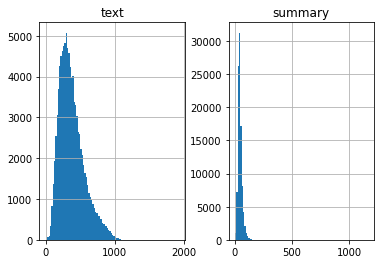

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 100)
plt.show()

In [ ]:
sum(text_word_count)/len(text_word_count)

377.11330128365967

In [ ]:
sum(summary_word_count)/len(summary_word_count)

46.43194797113522

In [ ]:
max(summary_word_count)

1161

In [ ]:
max(text_word_count)

1924

In [ ]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.9463853789254996


In [ ]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=380):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.5813904473237853


In [ ]:
max_len_text=380
max_len_summary=80

In [ ]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_len_summary and len(cleaned_text[i].split())<=max_len_text):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df['summary'] = df['summary'].apply(lambda x : '_START_ '+ x + ' _END_')
#df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df.head()

,text,summary
0,associated press published est october updated est october bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late s...,_START_ bishop john folda of north dakota is taking time off after being diagnosed he contracted the infection through contaminated food in italy church members in fargo grand forks and jamestown ...
1,ralph mata internal affairs lieutenant miami dade police department working division investigates allegations wrongdoing cops outside office authorities allege year old longtime officer worked dru...,_START_ criminal complaint cop used his role to help cocaine traffickers ralph mata an internal affairs lieutenant allegedly helped group get guns he also arranged to pay two assassins in murder p...
2,breezy sweep pen president vladimir putin wrote new chapter crimea turbulent history committing region future returned russian domain sixty years prior ukraine breakaway peninsula signed away swif...,_START_ nina dos santos says europe must be ready to accept sanctions will hurt both sides targeting russia business community would be one way of sapping their support for president putin she say...
3,fleetwood team still record sky bet league one win scunthorpe sent graham alexander men top table cod army playing third tier first time history six promotions nine years remarkable ascent shows s...,_START_ fleetwood top of league one after win at scunthorpe peterborough bristol city chesterfield and crawley all drop first points of the season stand in striker matt done scores hat trick as ro...
4,accused making many fashion faux pas holiday prime minister seems deaf critics yesterday david cameron seen pair beige loafers wore holiday last year mr cameron lanzarote family got shoes high str...,_START_ prime minister and his family are enjoying an easter break in lanzarote sported the same beige loafers as he wore in portugal last year pm sat and had drink at beach side cafe on the spani...


In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [ ]:
len(x_tr)

39571

In [ ]:
len(x_val)

16959

In [ ]:
#keras Tokenizer
#prepare a tokenizer for articles on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr)
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post')
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [ ]:
print("Tokenizer size: ",x_voc_size)
print("Tokens_x_tr: ",x_tr)
print("Tokens_x_val: ",x_val)

Tokenizer size:  141710
Tokens_x_tr:  [[4450 2690  640 ...    0    0    0]
 [  42  471 1979 ...    0    0    0]
 [2034 9906 1598 ...    0    0    0]
 ...
 [3446   36 2151 ...    0    0    0]
 [  63   81 1681 ...    0    0    0]
 [ 932 2786 1341 ...    0    0    0]]
Tokens_x_val:  [[  258   308   579 ...     0     0     0]
 [ 1036 13886    74 ...     0     0     0]
 [ 2604     3 20094 ...     0     0     0]
 ...
 [ 1344  6770    74 ...     0     0     0]
 [    5  1372   528 ...     0     0     0]
 [ 2449 19228   611 ...     0     0     0]]


In [ ]:
#preparing a tokenizer for summary on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr)
y_val   =   y_tokenizer.texts_to_sequences(y_val)

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:
print("Tokenizer size: ",y_voc_size)
print("Tokens_y_tr: ",y_tr)
print("Tokens_y_val: ",y_val)

Tokenizer size:  58449
Tokens_y_tr:  [[    5   677   430 ...     0     0     0]
 [    5    35  1802 ...     0     0     0]
 [    5  3426 34733 ...     0     0     0]
 ...
 [    5    64  2029 ...     0     0     0]
 [    5   103  1564 ...     0     0     0]
 [    5     1   551 ...     0     0     0]]
Tokens_y_val:  [[    5   363    53 ...     0     0     0]
 [    5 28009     8 ...     0     0     0]
 [    5    82  7610 ...     0     0     0]
 ...
 [    5 11088   428 ...     0     0     0]
 [    5    31  1032 ...     0     0     0]
 [    5 14232 21208 ...     0     0     0]]


In [ ]:
#GLOVE_DIR = ‪"D:\Capstone\TextSummarizer\content\glove.6B"
def glove_100d_dictionary():
  embeddings_index = {}
  f=open('/content/drive/MyDrive/Capstone dataset/glove.6B/glove.6B.300d.txt')
  #f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  f.close()
  return embeddings_index

In [ ]:
embeddings_index = {}
f=open('/content/drive/MyDrive/Capstone dataset/glove.6B/glove.6B.300d.txt',encoding="utf8")
#f = open(os.path.join('/content', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
word_index = x_tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.24135   ,  0.15132   ,  0.016839  , ...,  0.44316   ,
        -0.93458998,  0.40801999],
       [-0.36886001,  0.16665   ,  0.053452  , ..., -0.24409001,
        -0.030849  , -0.031811  ],
       ...,
       [-0.21725   ,  0.64305001, -0.43866   , ...,  0.42798999,
        -0.36004001, -0.037437  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
embedding_matrix.shape

(141710, 300)

In [ ]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
tf.test.is_gpu_available()

In [ ]:
#!pip install numpy==1.19.5

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
K.clear_session()
latent_dim = 500

# =====================
# 🔥 Encoder
# =====================
encoder_inputs = Input(shape=(max_len_text,))
enc_emb = Embedding(x_voc_size, 300, weights=[embedding_matrix],input_length=max_len_text, trainable=False)(encoder_inputs)

#LSTM 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#LSTM 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#LSTM 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# =====================
# 🌈 Decoder
# =====================
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(x_voc_size, 300, weights=[embedding_matrix],input_length=max_len_text, trainable=False)

dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

2022-04-19 19:22:19.918988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 19:22:19.958624: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2022-04-19 19:22:20.057447: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2022-04-19 19:22:20.062208: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2022-04-19 19:22:20.065275: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2022-04-19 19:22:20.069361: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 380)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 380, 300)     42513000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 380, 500), ( 1602000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Optional line as this can be called combine with other function shown below
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
x_tr
y_tr[:,:-1]
y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

In [ ]:
#for checkpoints saving
#!pip install pyyaml h5py
checkpoint_path = "/content/drive/MyDrive/Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1),tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)]

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=cp_callback,batch_size=32, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 39571 samples, validate on 16959 samples
Epoch 1/50
39552/39571 [============================>.] - ETA: 1s - loss: 3.9389 - acc: 0.5092
Epoch 00001: saving model to /content/drive/MyDrive/Checkpoints/cp.ckpt
39571/39571 [==============================] - 3218s 81ms/sample - loss: 3.9387 - acc: 0.5092 - val_loss: 3.4831 - val_acc: 0.5359
Epoch 2/50
39552/39571 [============================>.] - ETA: 1s - loss: 3.3900 - acc: 0.5349
Epoch 00002: saving model to /content/drive/MyDrive/Checkpoints/cp.ckpt
39571/39571 [==============================] - 3209s 81ms/sample - loss: 3.3901 - acc: 0.5349 - val_loss: 3.2468 - val_acc: 0.5499
Epoch 3/50
39552/39571 [============================>.] - ETA: 1s - loss: 3.0405 - acc: 0.5470
Epoch 00003: saving model to /content/drive/MyDrive/Checkpoints/cp.ckpt
39571/39571 [==============================] - 3235s 82ms/sample - loss: 3.0403 - acc: 0.5470 - val_loss: 3.1461 - val_acc: 0.5563
Epoch 4/50
39552/39571 [============================>.] 

**FOR LOADING SAVED CHECKPOINTS**
This may take time as saved checkpoints file is around 1.09 GB and dataset used is limited to 100k columns.

In [ ]:
# Loads the weights
history = model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate([x_val,y_val[:,:-1]],y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:], verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

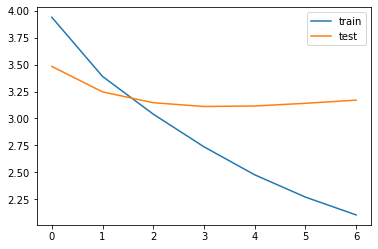

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#build the dictionary to convert the index to word for target and source vocabulary:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    # print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        # print("sampled_token:",sampled_token)
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
Original_Summary=[]
predicted_Summary=[]
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  Original_Summary.append(seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  predicted_Summary.append(decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Streaming output truncated to the last 5000 lines.
Predicted summary:  the elderly was taken by the medical centre in surrey it is believed to have been exposed to the hospital where he was taken to hospital with serious injuries


Review: twitter users erupted anger saturday discovering shirts listed amazon slogan appeared promote rape violence women shirt read keep calm rape available amazon uk website company prints shirts based solid gold bomb removed listing notified slogan company also removed shirt slogan keep calm hit solid gold bomb apologized saying slogans computer generated company deliberately create house passes violence women act gop version defeated founder michael fowler posted message company website saying extremely sorry issue simply produce poor humor offensive products fowler wrote father husband brother son would never promote product company clear see looking across millions shirts offer produce demand items ever sold would immediately pulled series amazon chann

KeyError: ignored

**EVALUATION OF MODEL**
DONE ON TESTING DATASET.VALIDATION WILL BE DONE IN WEBPAGE WHERE INPUT WILL BE GIVEN MANUALLY RATHER THAN TAKING FROM CSV FILE

In [ ]:
from datasets import load_metric
metric = load_metric("rouge")
def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

In [ ]:
calc_rouge_scores(predicted_Summary[:2453], Original_Summary[:2453])

{'rouge1': 31.8, 'rouge2': 11.6, 'rougeL': 21.7, 'rougeLsum': 21.3}